# **Performance Evaluation of VGG19 and LeNet5 for Detection of Malaria from Cell Images**

**What is Malaria?**

Malaria is a life-threatening disease spread to humans by some types of mosquitoes.Malaria is a serious and sometimes fatal disease caused by a parasite that commonly infects a certain type of mosquito which feeds on humans.

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

100% 674M/675M [00:31<00:00, 21.7MB/s]
100% 675M/675M [00:31<00:00, 22.6MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cell-images-for-detecting-malaria.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

## **Import all libraries**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,AvgPool2D,Activation
from keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import ResNet50
from keras.applications.vgg19 import preprocess_input
from keras import metrics
from keras.preprocessing.image import ImageDataGenerator
from keras import metrics





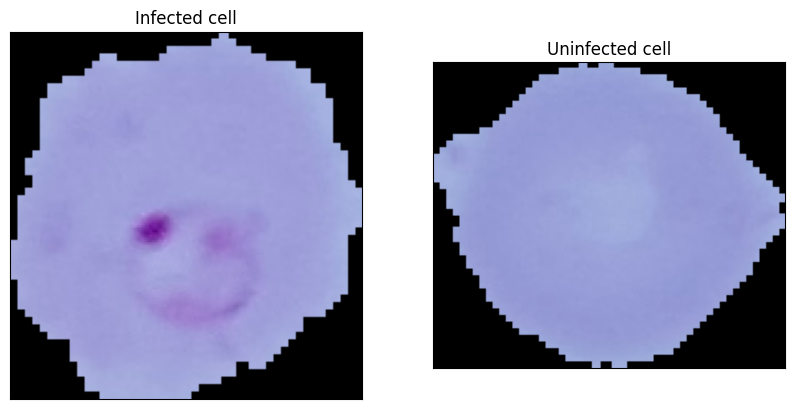

In [ ]:
import cv2
import os
import cv2
# test_img0 = cv2.imread('/content/cell_images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png')
# plt.subplot(1 , 2 , 2)
# plt.title('Infected Cell')

# plt.imshow(test_img0)


img1 = cv2.imread('/content/cell_images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png')
img2 = cv2.imread('/content/cell_images/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png')


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


axs[0].imshow(img1)
axs[0].set_title('Infected cell')


axs[1].imshow(img2)
axs[1].set_title('Uninfected cell')


for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])


plt.show()



## **Data Augmentation**

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_generator = train_datagen.flow_from_directory(
     '//content/cell_images/cell_images', 
        target_size=(98,98),  
        batch_size=2000,
        class_mode='binary',
        shuffle = True)

Found 27558 images belonging to 2 classes.


In [ ]:
validation_data_generator = test_datagen.flow_from_directory(
        '//content/cell_images/cell_images',
        target_size=(98,98),
        batch_size=2000,
        class_mode='binary',
        shuffle = True)

Found 27558 images belonging to 2 classes.


## **Apply VGG19 model**

In [ ]:
convulation_base_vgg19 = VGG19(
                  input_shape=(98,98,3),
                  weights='imagenet',
                  include_top=False) 

80134624/80134624 [==============================] - 5s 0us/step


In [ ]:
convulation_base_vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 98, 98, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 98, 98, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 98, 98, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 49, 49, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 49, 49, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 49, 49, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 24, 24, 128)       0     

In [ ]:
model = Sequential()
model.add(convulation_base_vgg19)
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

In [ ]:
convulation_base_vgg19.trainable = False

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 3, 3, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 1)                 4609      
                                                                 
Total params: 20,028,993
Trainable params: 4,609
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy", keras.metrics.Precision(), keras.metrics.Recall()])

In [ ]:
train_generator_samples = 27558
test_generator_samples = 27558

In [ ]:
history = model.fit_generator(train_data_generator, steps_per_epoch = train_generator_samples // 2000, 
                       epochs = 10, 
                       validation_data = validation_data_generator, 
                       validation_steps = test_generator_samples // 2000) 

<ipython-input-17-c21dcaaaae75>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data_generator, steps_per_epoch = train_generator_samples // 2000,


Epoch 1/10
13/13 [==============================] - 190s 12s/step - loss: 0.6905 - accuracy: 0.5727 - precision: 0.5766 - recall: 0.5497 - val_loss: 0.6056 - val_accuracy: 0.6295 - val_precision: 0.5789 - val_recall: 0.9392
Epoch 2/10
13/13 [==============================] - 128s 10s/step - loss: 0.5431 - accuracy: 0.7476 - precision: 0.7394 - recall: 0.7635 - val_loss: 0.5126 - val_accuracy: 0.7303 - val_precision: 0.6642 - val_recall: 0.9319
Epoch 3/10
13/13 [==============================] - 128s 10s/step - loss: 0.4621 - accuracy: 0.8054 - precision: 0.7989 - recall: 0.8157 - val_loss: 0.4441 - val_accuracy: 0.7924 - val_precision: 0.7253 - val_recall: 0.9410
Epoch 4/10
13/13 [==============================] - 128s 10s/step - loss: 0.4127 - accuracy: 0.8430 - precision: 0.8279 - recall: 0.8652 - val_loss: 0.4030 - val_accuracy: 0.8202 - val_precision: 0.7537 - val_recall: 0.9517
Epoch 5/10
13/13 [==============================] - 128s 10s/step - loss: 0.3785 - accuracy: 0.8594 - pr

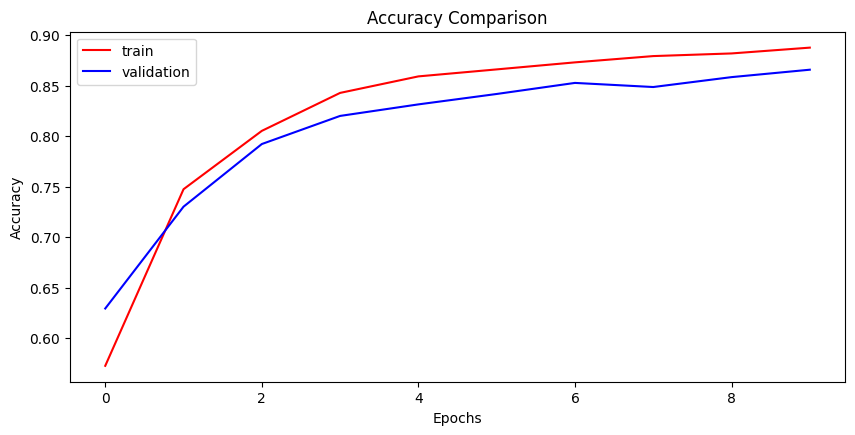

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')

plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

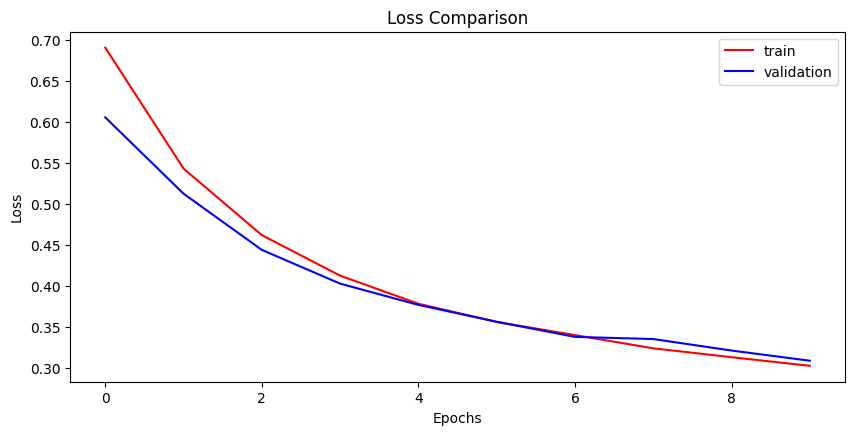

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model_test_performace = model.evaluate(validation_data_generator)

14/14 [==============================] - 40s 3s/step - loss: 0.3089 - accuracy: 0.8662 - precision: 0.8065 - recall: 0.9636


In [ ]:
print("Validation Loss:", "{:.2f}".format(model_test_performace[0]))
print("Validation Accuracy:","{:.2f}".format(model_test_performace[1]))
print("Validation Precision:", "{:.2f}".format(model_test_performace[2]))
print("Validation Recall:", "{:.2f}".format(model_test_performace[3]))

Validation Loss: 0.31
Validation Accuracy: 0.87
Validation Precision: 0.81
Validation Recall: 0.96


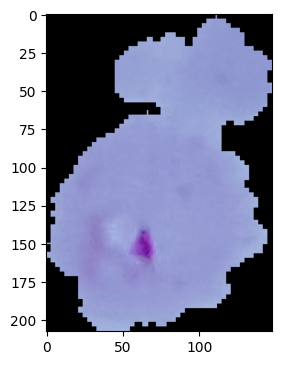

In [ ]:
test_img = cv2.imread('/content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png')
plt.subplot(1 , 2 , 2)
plt.imshow(test_img)

In [ ]:
test_img.shape

(208, 148, 3)

In [ ]:
test_img = cv2.resize(test_img,(98,98))
test_input = test_img.reshape((1,98,98,3))

pred = model.predict(test_input)
if(pred == 1):
  print("The Predicted Class is: Uninfected")
else:
  print("The Predicted Class is: Infected")

1/1 [==============================] - 1s 647ms/step
The Predicted Class is: Infected


# **Apply Another Architecture LETNET5**

---



In [ ]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5,5), padding='valid', input_shape=(98,98,3), activation='tanh'))
model.add(AvgPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='tanh'))
model.add(AvgPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 47, 47, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 43, 43, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 21, 21, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 7056)              0         
                                                                 
 dense_1 (Dense)             (None, 120)              

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy", keras.metrics.Precision(), keras.metrics.Recall()])

In [ ]:
train_generator_samples = 27558
test_generator_samples = 27558

In [ ]:
history1 = model.fit_generator(train_data_generator, steps_per_epoch = train_generator_samples // 2000, 
                       epochs = 10, 
                       validation_data = validation_data_generator, 
                       validation_steps = test_generator_samples // 2000) 

<ipython-input-29-34ef04233c18>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model.fit_generator(train_data_generator, steps_per_epoch = train_generator_samples // 2000,


Epoch 1/10
13/13 [==============================] - 125s 9s/step - loss: 0.8438 - accuracy: 0.5244 - precision_1: 0.5294 - recall_1: 0.4320 - val_loss: 0.6764 - val_accuracy: 0.5460 - val_precision_1: 0.5256 - val_recall_1: 0.9536
Epoch 2/10
13/13 [==============================] - 110s 9s/step - loss: 0.6526 - accuracy: 0.6188 - precision_1: 0.5967 - recall_1: 0.7390 - val_loss: 0.6317 - val_accuracy: 0.6563 - val_precision_1: 0.6202 - val_recall_1: 0.8059
Epoch 3/10
13/13 [==============================] - 118s 9s/step - loss: 0.6273 - accuracy: 0.6577 - precision_1: 0.6450 - recall_1: 0.6983 - val_loss: 0.6247 - val_accuracy: 0.6595 - val_precision_1: 0.6235 - val_recall_1: 0.8055
Epoch 4/10
13/13 [==============================] - 111s 9s/step - loss: 0.6155 - accuracy: 0.6668 - precision_1: 0.6480 - recall_1: 0.7329 - val_loss: 0.6074 - val_accuracy: 0.6762 - val_precision_1: 0.6638 - val_recall_1: 0.7124
Epoch 5/10
13/13 [==============================] - 117s 9s/step - loss: 0.6

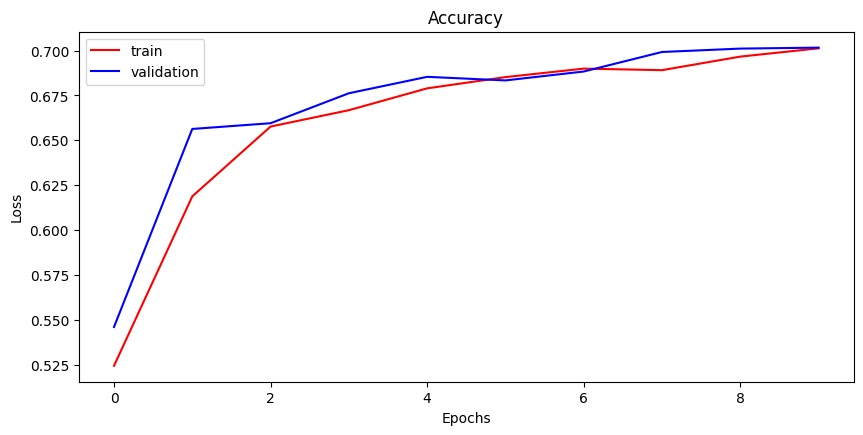

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(history1.history['accuracy'],color='red',label='train')
plt.plot(history1.history['val_accuracy'],color='blue',label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model_test_performace = model.evaluate(validation_data_generator)

14/14 [==============================] - 31s 2s/step - loss: 0.5757 - accuracy: 0.7014 - precision_1: 0.6680 - recall_1: 0.8008


In [ ]:
print("Validation Loss:", "{:.2f}".format(model_test_performace[0]))
print("Validation Accuracy:","{:.2f}".format(model_test_performace[1]))
print("Validation Precision:", "{:.2f}".format(model_test_performace[2]))
print("Validation Recall:", "{:.2f}".format(model_test_performace[3]))

Validation Loss: 0.58
Validation Accuracy: 0.70
Validation Precision: 0.67
Validation Recall: 0.80


# **Visualize Class Activation Map**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg19 import VGG19
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from keras.utils import plot_model
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

model = VGG19()
model = Model(inputs=model.inputs , outputs=model.layers[1].output)

574710816/574710816 [==============================] - 26s 0us/step


In [ ]:
image = load_img("/content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png" , target_size=(224,224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

1/1 [==============================] - 0s 76ms/step


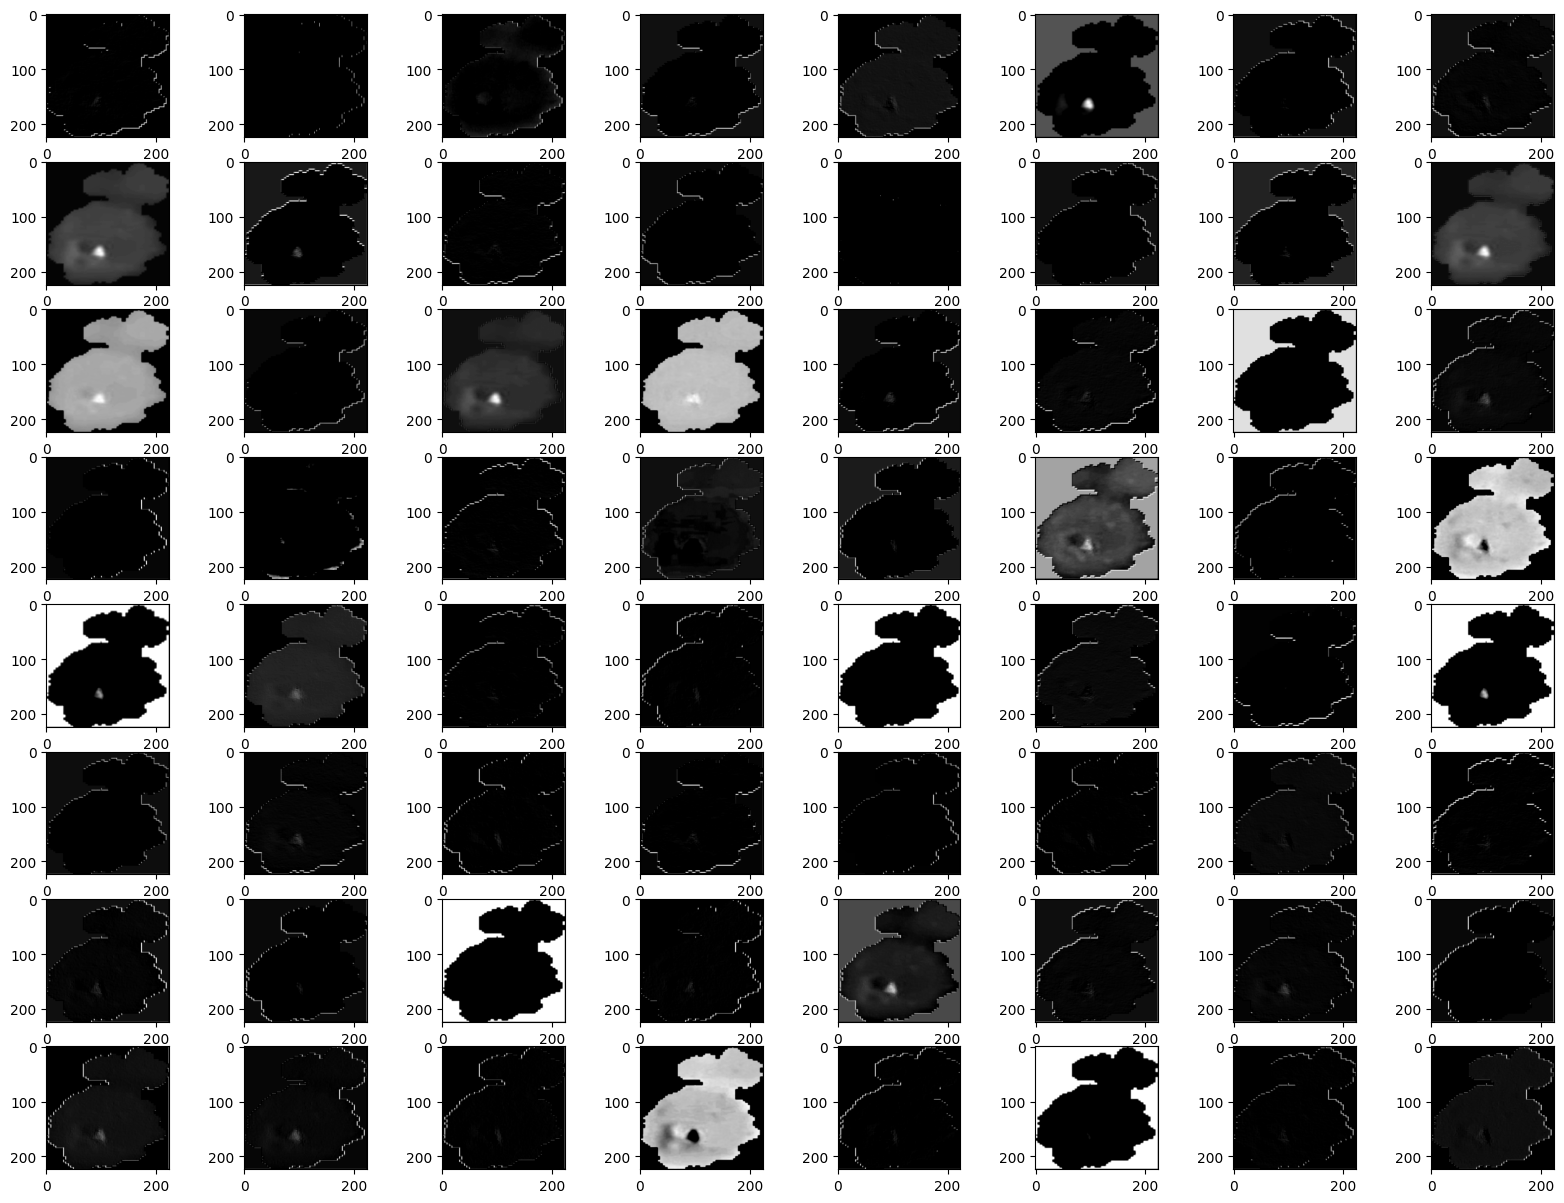

In [ ]:
features = model.predict(image)

fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1] , cmap='gray')
    
plt.show()